In [2]:
import numpy as np
import pandas as pd
#import sklearn
import matplotlib.pyplot as plt
#import seaborn as sns
#import scipy

In [3]:
df = pd.read_fwf("dataset.txt")
df.head()

,CUST NO.,XCOORD.,YCOORD.,DEMAND,READY TIME,DUE DATE,SERVICE,TIME
0,1,35.0,35.0,0.0,0.0,230.0,0.0,NaN
1,2,41.0,49.0,10.0,161.0,171.0,10.0,NaN
2,3,35.0,17.0,7.0,50.0,60.0,10.0,NaN
3,4,55.0,45.0,13.0,116.0,126.0,10.0,NaN
4,5,55.0,20.0,19.0,149.0,159.0,10.0,NaN


In [8]:
df.describe()

,CUST NO.,XCOORD.,YCOORD.,DEMAND,READY TIME,DUE DATE,SERVICE,TIME
count,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.0,0.0
mean,13.000000,33.04000,34.560000,13.040000,91.560000,110.360000,9.6,NaN
std,7.359801,17.27831,18.823921,7.645696,43.344627,46.218575,2.0,NaN
min,1.000000,5.00000,5.000000,0.000000,0.000000,42.000000,0.0,NaN
25%,7.000000,20.00000,20.000000,8.000000,63.000000,77.000000,10.0,NaN
50%,13.000000,30.00000,35.000000,12.000000,87.000000,105.000000,10.0,NaN
75%,19.000000,45.00000,49.000000,19.000000,124.000000,136.000000,10.0,NaN
max,25.000000,65.00000,65.000000,29.000000,161.000000,230.000000,10.0,NaN


In [4]:
df.drop(columns=["TIME","DEMAND","SERVICE"])

,CUST NO.,XCOORD.,YCOORD.,READY TIME,DUE DATE
0,1,35.0,35.0,0.0,230.0
1,2,41.0,49.0,161.0,171.0
2,3,35.0,17.0,50.0,60.0
3,4,55.0,45.0,116.0,126.0
4,5,55.0,20.0,149.0,159.0
5,6,15.0,30.0,34.0,44.0
6,7,25.0,30.0,99.0,109.0
7,8,20.0,50.0,81.0,91.0
8,9,10.0,43.0,95.0,105.0
9,10,55.0,60.0,97.0,107.0


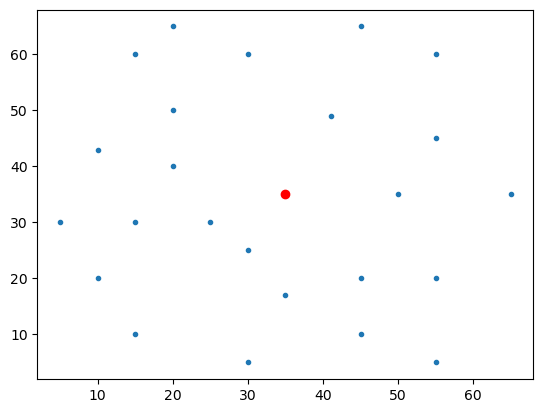

In [5]:
plt.plot(df["XCOORD."],df["YCOORD."],".")
plt.plot(df["XCOORD."][0],df["YCOORD."][0],"or")

25

In [7]:
from docplex.mp.model import Model

# Create model
mdl = Model('LP')

# Parameters
N = [n for n in range(1, df.shape[0]+1)]  # 25 variables

# Variables
x_dict = [1, 2, 3]
x = mdl.continuous_var_dict(x_dict, lb=0, name='x')

# Constraints 
mdl.add_constraint(3*x[1]+x[2]+x[3] <= 60)
mdl.add_constraint(x[1]-x[2]+2*x[3] <= 10)
mdl.add_constraint(x[1]+x[2]-x[3] <= 20)

Z = mdl.continuous_var(lb=0, name='Z')
mdl.add_constraint(Z == 2*x[1] - x[2] + x[3])
mdl.maximize(Z)

mdl.print_information()

solution = mdl.solve()

print(solution)
print(solution._solve_details)



ModuleNotFoundError: No module named 'docplex'